# Chocolate Bar Competition

## 📖 Background
I work at a specialty foods import company that wants to expand into gourmet chocolate bars. My boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, I will explore if the chocolate bars with the highest ratings share any characteristics that could help me narrow my search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### My team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
I  will now create a report to summarize my research. The report below will include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5a. [Optional 1] How does cocoa content relate to rating? 5b. What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## 1 & 3. Find Mean Chocolate bar Rating According to Country of Origin of the Cocoa Bean and Create Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/chocolate_bars.csv')
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [ ]:
df1a = df.groupby('bean_origin')[['rating']].mean()

In [ ]:
df1a.head(5)

,rating
bean_origin,
Australia,3.250000
Belize,3.233553
Blend,3.038462
Bolivia,3.181250
Brazil,3.262821


In [ ]:
df8a = df1a.reset_index()


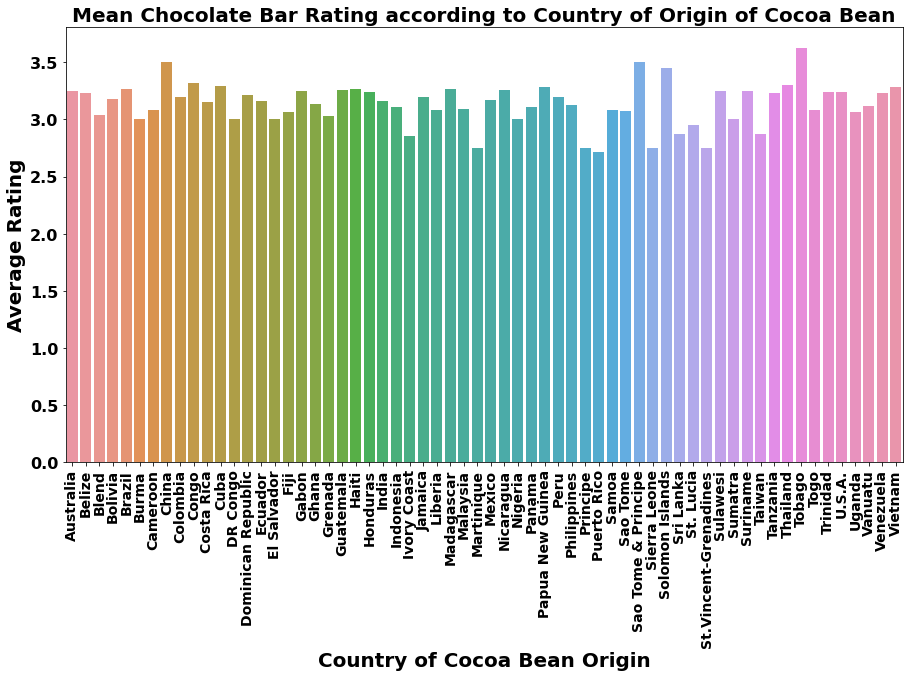

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (15,8))
ax = sns.barplot(x='bean_origin', y='rating', data=df8a)

plt.xticks(rotation = 90, weight = 'bold', size = 14)
plt.yticks(weight = 'bold', size = 16)
#plt.yticklabels(weight = 'bold')
ax.set_ylabel("Average Rating", fontsize = 20, weight = 'bold')
ax.set_xlabel("Country of Cocoa Bean Origin", fontsize = 20, weight = 'bold')
plt.title("Mean Chocolate Bar Rating according to Country of Origin of Cocoa Bean", weight = 'bold', size = 20)
plt.show()

## 1.  Please refer to table and bar graph above for average chocolate bar rating according to country of origin of the cocoa bean.  Problem with this graph is it fails to indicate the number of ratings for each country of bean origin, thereby making the less statistically significant bars equal to the more statistically significant bars.  I will fix this shortly.

## 2 & 3. How many chocolate bars were reviewed for each country of origin? 

In [ ]:
df2a = df['bean_origin'].value_counts()

In [ ]:
df2a.shape

(62,)

In [ ]:
df2a.head()

Venezuela             253
Peru                  244
Dominican Republic    226
Ecuador               219
Madagascar            177
Name: bean_origin, dtype: int64

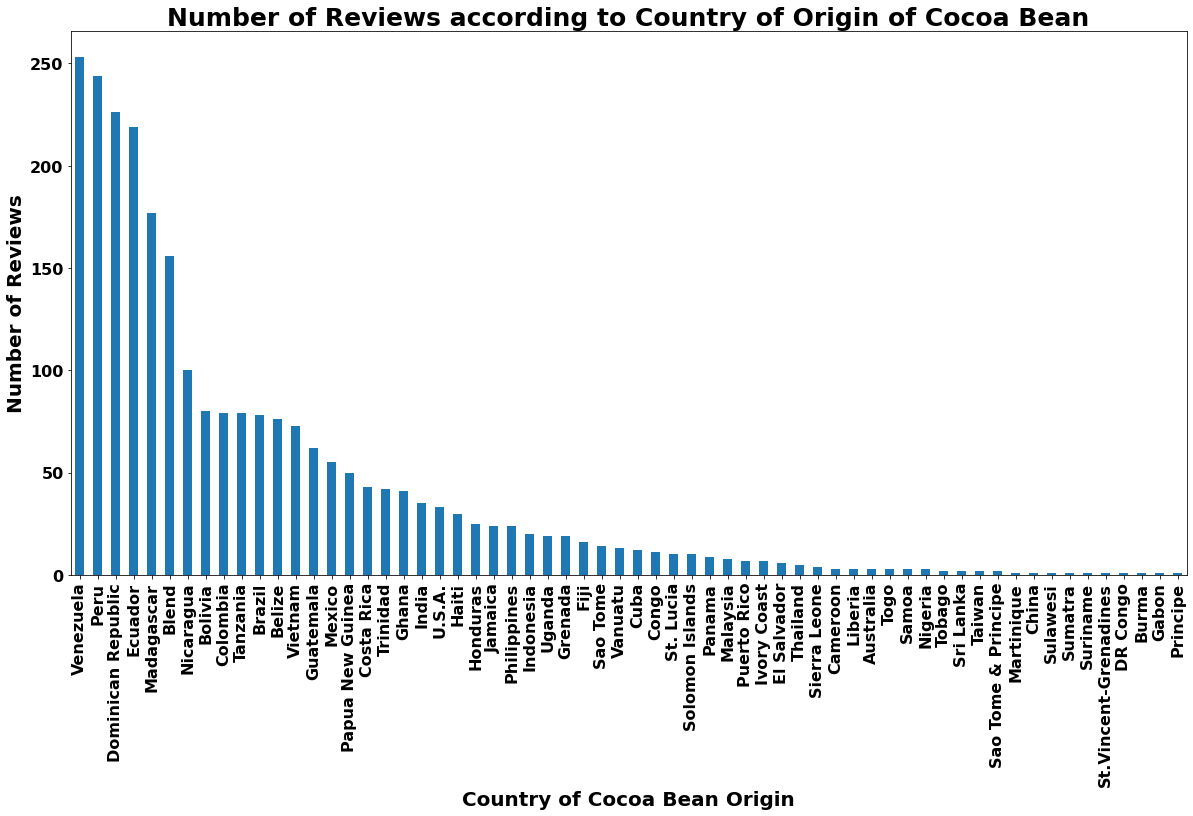

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#ax = sns.barplot(x=df2a.index, y=df2a)
#plt.figsize(15,8)
#plt.figure(figsize = (15,8))
ax = df2a.plot(kind="bar", figsize=(20,10))
plt.xticks(rotation = 90, weight = 'bold', size = 16)
plt.yticks(weight = 'bold', size = 16)
#plt.yticklabels(weight = 'bold')
ax.set_ylabel("Number of Reviews", fontsize = 20, weight = 'bold')
ax.set_xlabel("Country of Cocoa Bean Origin", fontsize = 20, weight = 'bold')
plt.title("Number of Reviews according to Country of Origin of Cocoa Bean", weight = 'bold', size = 25)
plt.show()

## 2. Please refer to bar chart and table above for number of reviews according to country of origin of cocoa bean.  As can be seen above, the data is not evenly distributed, but instead is concentrated into just a few countries of origin, thereby potentially distorting skewing the statistical significance of data.

### Now I will create an ensemble chart showing average rating for each country of origin color coded to show number of reviews

In [ ]:
df2b = pd.concat([df1a, df2a], axis = 1)

In [ ]:
df2c = df2b.reset_index()
df2c.rename({'index':'bean_origin', 'bean_origin': 'num_of_ratings', 'rating':'mean_rating'}, axis = 'columns', inplace = True)
df2c.head(31)

,bean_origin,mean_rating,num_of_ratings
0,Australia,3.250000,3
1,Belize,3.233553,76
2,Blend,3.038462,156
3,Bolivia,3.181250,80
4,Brazil,3.262821,78
5,Burma,3.000000,1
6,Cameroon,3.083333,3
7,China,3.500000,1
8,Colombia,3.196203,79
9,Congo,3.318182,11


In [ ]:
df2c.tail(31)

,bean_origin,mean_rating,num_of_ratings
31,Mexico,3.168182,55
32,Nicaragua,3.255000,100
33,Nigeria,3.000000,3
34,Panama,3.111111,9
35,Papua New Guinea,3.280000,50
36,Peru,3.197746,244
37,Philippines,3.125000,24
38,Principe,2.750000,1
39,Puerto Rico,2.714286,7
40,Samoa,3.083333,3


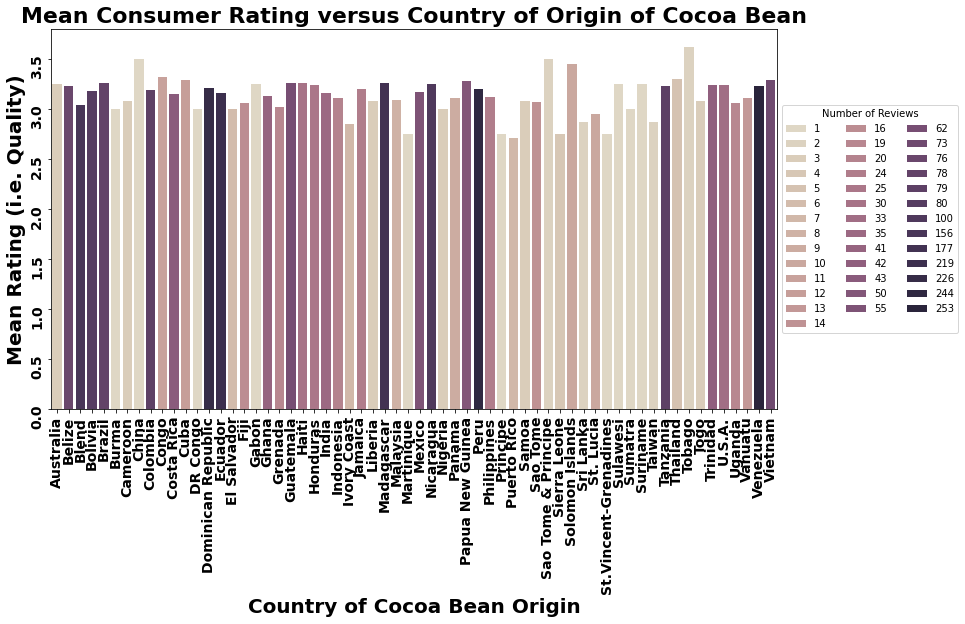

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.barplot(data=df2c, x="bean_origin", y='mean_rating', hue = 'num_of_ratings', dodge = False, palette = "ch:s=-.2,r=.6")
ax.set_ylabel("Mean Rating (i.e. Quality)", fontsize = 20, weight = 'bold')
ax.set_xlabel("Country of Cocoa Bean Origin", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90, weight = 'bold', size = 14)
plt.yticks(rotation=90, weight = 'bold', size = 14)
plt.title('Mean Consumer Rating versus Country of Origin of Cocoa Bean', size = 22, weight = 'bold')
ax.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=3, title = 'Number of Reviews')
plt.show()


## The above chart clearly shows which bars are less statistically significant (light-colored bars) and which bars are more statistically significant (dark-colored bars).  Nevertheless, I find little variance in average consumer ratings versus country of origin of the cocoa bean.

### Now I will produce a heat map showing the number of reviews for each country of origin/rating combination:

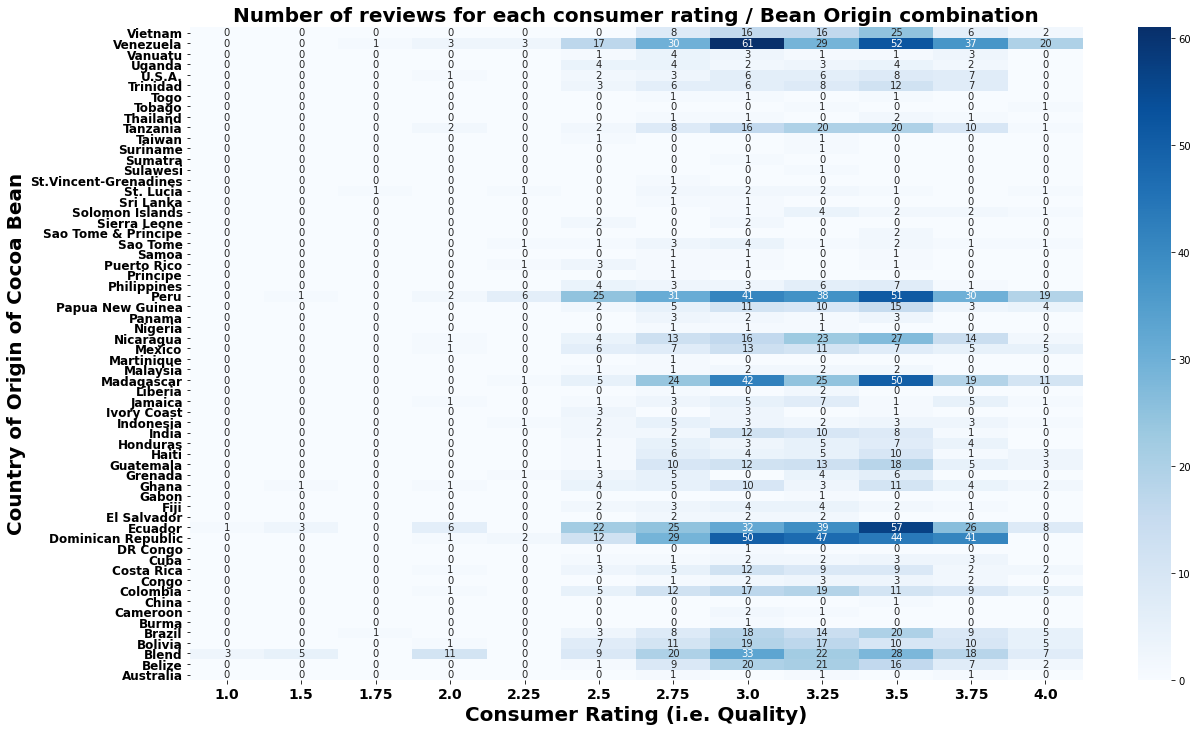

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(pd.crosstab(df['bean_origin'], df['rating']), cmap = 'Blues', annot = True, fmt = 'g')
plt.title('Number of reviews for each consumer rating / Bean Origin combination', size = 20, weight = 'bold')
ax.set_ylabel("Country of Origin of Cocoa Bean", fontsize = 20, weight = 'bold')
ax.set_xlabel("Consumer Rating (i.e. Quality)", fontsize = 20, weight = 'bold')
#ax.legend('Number of Reviews', title = 'Number of Reviews')
plt.xticks(weight = 'bold', size = 14)
plt.yticks(weight = 'bold', size = 12)
ax.invert_yaxis()
plt.show()

## 1-4. Minimal change in mean customer rating versus country of origin of cocoa bean is observed.  Also, by using the hue function, it is intuitive as to which mean rating values have less statistical significance (i.e. lighter colored) due to fewer number of reviews and which have more statistical significance due to higher number of reviews (i.e. darker color)

## 5a.  Cocoa content vis-a-vis quality (i.e. consumer ratings) 

In [ ]:
df['cocoa_percent'].value_counts().head()

70.0    1046
75.0     310
72.0     295
65.0      90
80.0      89
Name: cocoa_percent, dtype: int64

In [ ]:
df['rating'].value_counts().head()

3.50    565
3.00    523
3.25    464
2.75    333
3.75    300
Name: rating, dtype: int64

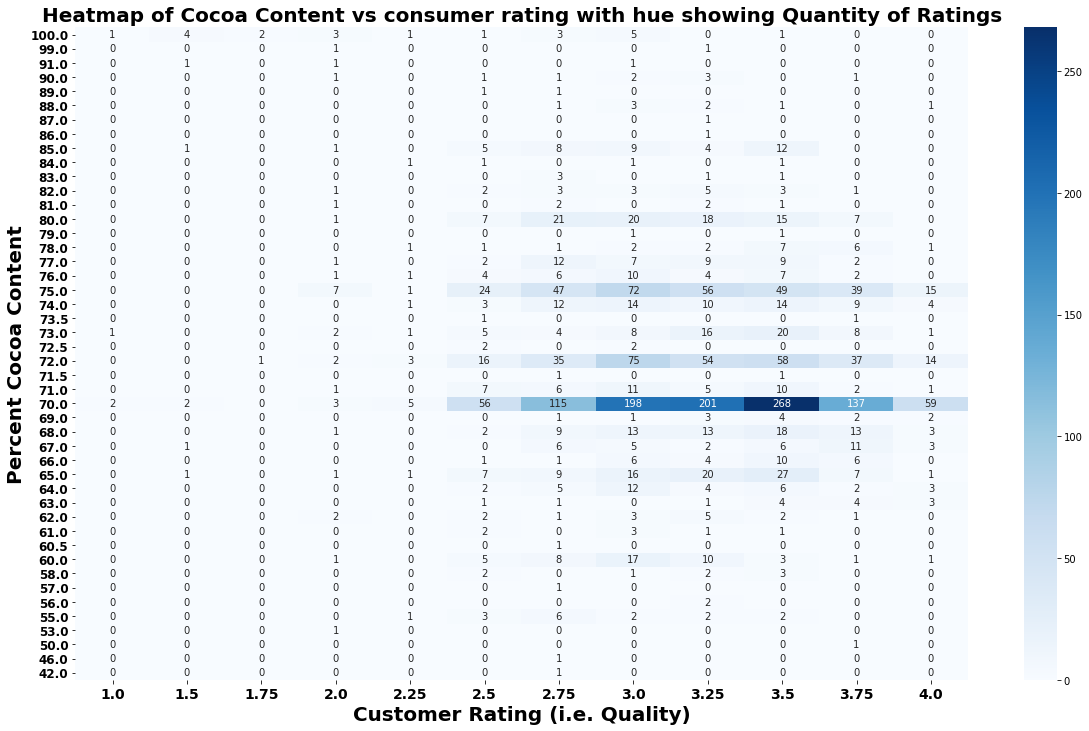

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(pd.crosstab(df['cocoa_percent'], df['rating']), cmap = 'Blues', annot = True, fmt = 'g')
plt.title('Heatmap of Cocoa Content vs consumer rating with hue showing Quantity of Ratings', size = 20, weight = 'bold')
ax.set_xlabel("Customer Rating (i.e. Quality)", fontsize = 20, weight = 'bold')
ax.set_ylabel("Percent Cocoa Content", fontsize = 20, weight = 'bold')
#ax.legend('Number of Reviews', title = 'Number of Reviews')
plt.xticks(weight = 'bold', size = 14)
plt.yticks(weight = 'bold', size = 12)
ax.invert_yaxis()
plt.show()

## 5a. As seen above, cocoa content seems to have minimal effect on average consumer rating.  If anything, there is a slight negative correlation (i.e. slightly downward slopeline) where ratings decrease minimally with increased cocoa content. Also note that cocoa bars with 70% cocoa have a disproportionately large number of reviews compared to all other cocoa contents, making the other cocoa contents less statistically significant

### Now we will embody the above in a barchart for alternate viewing:

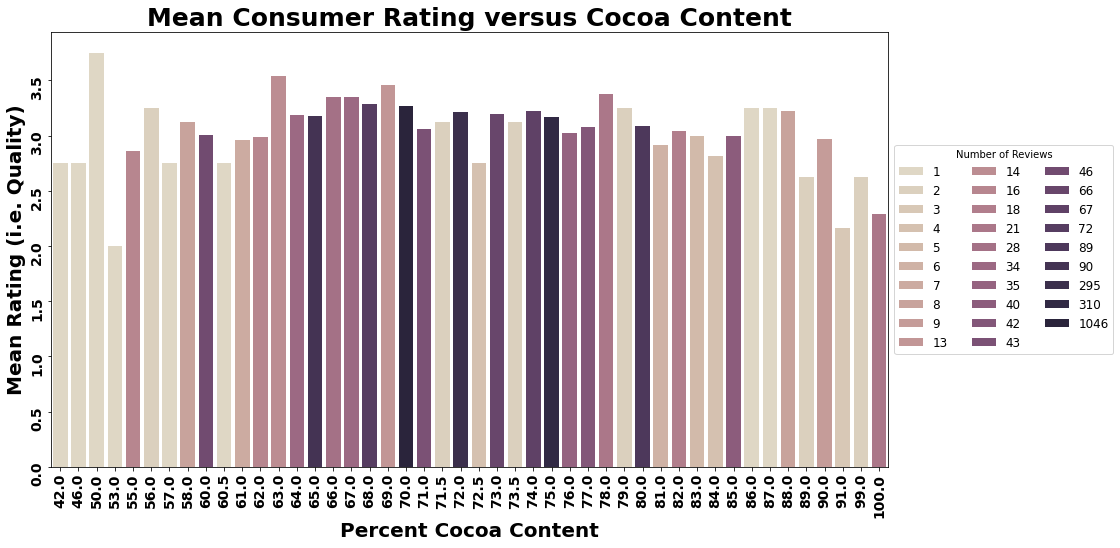

In [ ]:
dx1a = df.groupby('cocoa_percent').size()
dx1b = df.groupby('cocoa_percent')['rating'].mean()
dx2b = pd.concat([dx1a, dx1b], axis = 1)
dx2c = dx2b.reset_index()
dx2c.rename({0:'num_of_ratings', 'rating': 'mean_rating'}, axis = 'columns', inplace = True)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(data=dx2c, x="cocoa_percent", y='mean_rating', hue = 'num_of_ratings', dodge = False, palette = "ch:s=-.2,r=.6")
ax.set_ylabel("Mean Rating (i.e. Quality)", fontsize = 20, weight = 'bold')
ax.set_xlabel("Percent Cocoa Content", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90, weight = 'bold', size = 14)
plt.yticks(rotation=90, weight = 'bold', size = 14)
ax.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=3, title = 'Number of Reviews', fontsize = 'large')
plt.title('Mean Consumer Rating versus Cocoa Content', size = 25, weight = 'bold')
plt.show()

### As indicated above, nearly all of the ratings were for chocolate bars having 70% cocoa content making all other ratings of much lower statistical significance.  Very little change in customer ratings as a function of cocoa content was observed.  
### Lets now illustrate the above as a heatmap:

## 5b.  What is the average cocoa content for bars with ratings above 3.5?

In [ ]:
dfhighcc = df[df['rating'] > 3.5000]
print("Average cocoa content for bars having a rating above 3.5 is: ", round(dfhighcc['cocoa_percent'].mean(), 2))

Average cocoa content for bars having a rating above 3.5 is:  70.95


In [ ]:
dflowcc = df[df['rating'] <= 3.5000]
#dflowcc['cocoa_percent'].mean()
print("Average cocoa content for bars having a rating of 3.5 and less is: ", round(dflowcc['cocoa_percent'].mean(), 2))

Average cocoa content for bars having a rating of 3.5 and less is:  71.77


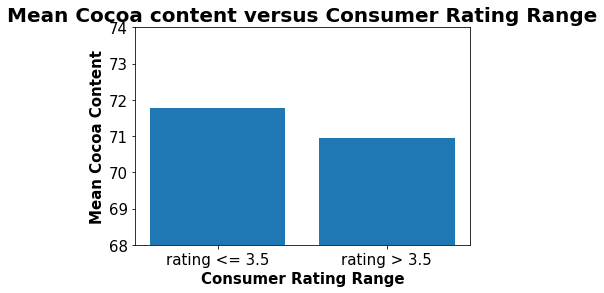

In [ ]:
plt.bar(['rating <= 3.5', 'rating > 3.5'], [df[df['rating'] <= 3.5000]['cocoa_percent'].mean(), df[df['rating'] > 3.5000]['cocoa_percent'].mean()])
plt.xlabel("Consumer Rating Range", fontweight = 'bold', fontsize = 15)
plt.ylabel("Mean Cocoa Content", fontweight = 'bold', fontsize = 15)
plt.title("Mean Cocoa content versus Consumer Rating Range", fontweight = 'bold', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylim([68, 74])
plt.show()

### In conclusion for part 5b, the average cocoa content for ratings above 3.5 was 71.1% while the average cocoa content for bars with rating equal to and below 3.5 was 71.8%.  This reinforces my earlier conclusion that there is essentially no to a slight negative correlation between ratings and cocoa content. 

## 6.  Effect of Lecithin on consumer ratings

## need to create a flag column indicating whether or not lecithin is included in the chocolate bar the consumer is rating

In [ ]:
bool_find = df['ingredients'].str.contains('L')
df['lecithin_flag'] = bool_find
df.groupby('lecithin_flag')['rating'].mean()

lecithin_flag
False    3.225128
True     3.150609
Name: rating, dtype: float64

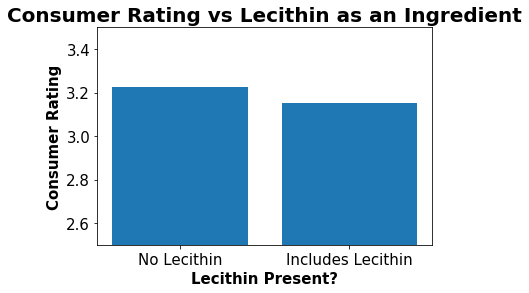

In [ ]:
plt.bar(['No Lecithin', 'Includes Lecithin'], df.groupby('lecithin_flag')['rating'].mean())
plt.xlabel("Lecithin Present?", fontweight = 'bold', fontsize = 15)
plt.ylabel("Consumer Rating", fontweight = 'bold', fontsize = 15)
plt.title("Consumer Rating vs Lecithin as an Ingredient", fontweight = 'bold', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylim([2.5, 3.5])
plt.show()

## 6. Presence of Lecithin has minimal effect (< 0.10) on consumer rating.  Bars without Lecithin had 0.075 point average higher consumer rating than bars with Lechithin.

## 7.  Overall Conclusions and Summary
### There is very variation between mean ratings by consumers and country of cocoa bean origin and between mean ratings by consumers and cocoa content.  If anything, there is only a slight negative correlations where ratings slightly decrease with increased cocoa content. 

### It is also pointed out that the data is marred by data concentration pockets whereby chocolate bars with certain bean origin countries and certain cocoa contents had a huge number of reviews while other countries of bean origins and other cocoa contents had very few reviews making these cohorts less statistically significant.  In other words, the volume of data (i.e. reviews) was not spread evenly across cocoa bean origin countries and cocoa content, making any conclusion drawn from this data less significant. 